In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal
from scipy.signal import find_peaks
import matplotlib.lines as mlines
import numpy as np
import os

In [ ]:
import pandas as pd

# Cargar los datos del espectro, especificando el delimitador y manejando errores
data = pd.read_csv(
    "/content/drive/MyDrive/Práctica Rafa (no BORRAR)/0.3_50.csv",
    sep=",",  # Especifica el delimitador (coma por defecto, pero puedes cambiarlo)
    on_bad_lines="warn",  # Muestra una advertencia para las líneas con errores en lugar de generar una excepción
    #error_bad_lines=False # Salta las líneas malas
    skiprows=22, #Se salta las primeras 22 lineas
    header=0 # Define the first row as the header row
)  # Reemplaza con tu archivo

# Check the number of columns in your DataFrame
num_cols = data.shape[1]
print(f"The DataFrame has {num_cols} columns.")

# Accessing data based on the number of columns
if num_cols >= 2:  # If the DataFrame has at least 2 columns
    # Assuming the first column is date/time and the second is intensity
    # If this is incorrect, adjust the column indices accordingly
    longitud_onda = pd.to_numeric(data.iloc[:, 0], errors='coerce') # Try converting the first column to numeric, handling errors
    intensidad = pd.to_numeric(data.iloc[:, 1], errors='coerce')  # Try converting the second column to numeric, handling errors


    # Drop rows with NaN values resulting from conversion errors
    data = data.dropna()

    # Update longitud_onda and intensidad after dropping NaN values
    longitud_onda = data.iloc[:, 0].values # Convert to NumPy array
    intensidad = data.iloc[:, 1].values # Convert to NumPy array

The DataFrame has 2 columns.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Encontrar los picos en el espectro

# Now use intensidad_numeric for peak finding
indices_picos = find_peaks(intensidad, height=1.2)[0]  # Ajusta el parámetro 'height'
print (indices_picos)
longitudes_pico = longitud_onda[indices_picos]

[  49  184  290  663  766 1169 1203 1310 1354 1395 1425 1500 1522 1557
 1607 1657 1661]


In [ ]:
#Convertir longitudes de onda a energías (eV)
energias_pico = 1240 / longitudes_pico  # Relación E(eV) = 1240 / lambda (nm)

In [ ]:
# Mostrar los máximos detectados
print("Picos detectados:")

fichero_salida = "/content/drive/MyDrive/Práctica Rafa (no BORRAR)/Resultados/0.3_50.txt"

with open(fichero_salida, 'w') as f:

  for i, (longitud, energia, intensidad_pico) in enumerate(zip(longitudes_pico, energias_pico, intensidad[indices_picos]), start=1):
      # Convert intensidad_pico to a numeric type before formatting
      try:
          intensidad_pico_num = float(intensidad_pico)
          print(f"Pico {i}: Longitud de onda = {longitud:.2f} nm, Energía = {energia:.2f} eV, Intensidad = {intensidad_pico_num:.2f}")
          f.write(f"Pico {i}: Longitud de onda = {longitud:.2f} nm, Energía = {energia:.2f} eV, Intensidad = {intensidad_pico_num:.2f}")
          f.write("\n")
      except ValueError:
          print(f"Pico {i}: Longitud de onda = {longitud:.2f} nm, Energía = {energia:.2f} eV, Intensidad = {intensidad_pico} (Non-numeric)")
          f.write(f"Pico {i}: Longitud de onda = {longitud:.2f} nm, Energía = {energia:.2f} eV, Intensidad = {intensidad_pico} (Non-numeric)")
          f.write("\n")

Picos detectados:
Pico 1: Longitud de onda = 365.10 nm, Energía = 3.40 eV, Intensidad = 7.13
Pico 2: Longitud de onda = 404.80 nm, Energía = 3.06 eV, Intensidad = 3.96
Pico 3: Longitud de onda = 436.00 nm, Energía = 2.84 eV, Intensidad = 11.36
Pico 4: Longitud de onda = 546.20 nm, Energía = 2.27 eV, Intensidad = 11.60
Pico 5: Longitud de onda = 576.70 nm, Energía = 2.15 eV, Intensidad = 1.32
Pico 6: Longitud de onda = 696.30 nm, Energía = 1.78 eV, Intensidad = 1.93
Pico 7: Longitud de onda = 706.30 nm, Energía = 1.76 eV, Intensidad = 1.29
Pico 8: Longitud de onda = 738.10 nm, Energía = 1.68 eV, Intensidad = 3.17
Pico 9: Longitud de onda = 751.10 nm, Energía = 1.65 eV, Intensidad = 4.07
Pico 10: Longitud de onda = 763.30 nm, Energía = 1.62 eV, Intensidad = 12.29
Pico 11: Longitud de onda = 772.20 nm, Energía = 1.61 eV, Intensidad = 4.73
Pico 12: Longitud de onda = 794.50 nm, Energía = 1.56 eV, Intensidad = 4.62
Pico 13: Longitud de onda = 801.00 nm, Energía = 1.55 eV, Intensidad = 6.52


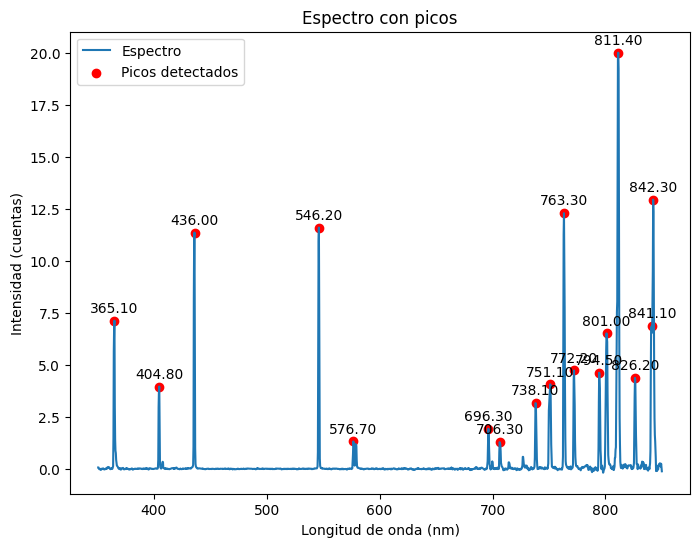

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'longitud_onda' is a pandas Series or a list-like object
# Convert 'longitud_onda' to numeric, handling errors if it's not already numeric
if not isinstance(longitud_onda, np.ndarray):  # Check if it's not already a NumPy array
    longitud_onda = pd.to_numeric(longitud_onda, errors='coerce').dropna().to_numpy()
else:
    # If it's already a NumPy array, handle NaNs if necessary
    longitud_onda = longitud_onda[~np.isnan(longitud_onda)]

#Dibujar el espectro con los picos marcados
plt.figure(figsize=(8, 6))

# 'intensidad' is already a NumPy array, so we replace NaNs with 0 using np.nan_to_num
intensidad = np.nan_to_num(intensidad, nan=0)

plt.plot(longitud_onda, intensidad, label="Espectro")
plt.scatter(longitudes_pico, intensidad[indices_picos], color="red", label="Picos detectados")

# Agregar etiquetas con los valores de las longitudes de onda en los picos
for i, x in enumerate(longitudes_pico):
    plt.text(x, intensidad[indices_picos][i] + 0.4, f"{x:.2f}", color="black", ha="center")


plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Intensidad (cuentas)")
plt.title("Espectro con picos")
plt.legend()

plt.savefig("/content/drive/MyDrive/Práctica Rafa (no BORRAR)/Plots/0.3_50.png")
plt.show()